In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Objective 1 (Prepare and QA the Data)

#Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.
#Perform basic profiling & QA on the data.
#Filter data to 2014 and join it with HDI csv file on "Country Code".

In [4]:
world_bank = pd.read_excel(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Visualization with Matplotlib & Seaborn/Data Viz with Matplotlib & Seaborn/World+Economic+Indicators/WorldBank.xlsx",
    dtype = {"Year": "Int16"}
)

In [5]:
world_bank.shape

(12449, 15)

In [6]:
world_bank.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [7]:
world_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country Name                                                  12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  Int16  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [8]:
world_bank.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
count,12449.0,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000
mean,1989.0,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703
min,1960.0,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000
25%,1974.0,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000
50%,1989.0,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000
75%,2004.0,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250
max,2018.0,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000


In [9]:
world_bank["Population (M)"] = world_bank["GDP (USD)"]/world_bank["GDP per capita (USD)"]/1000000

In [10]:
world_bank.loc[(world_bank["GDP (USD)"].notna()) & (world_bank["GDP per capita (USD)"].notna())].shape

(9575, 16)

In [11]:
world_bank.loc[world_bank["Population (M)"].isna()]

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
17,Afghanistan,AFG,South Asia,Low income,2001,47.505,11.387,NaN,NaN,NaN,0.004723,88.0,56.308,33.0959,3.426,NaN
18,Afghanistan,AFG,South Asia,Low income,2000,48.021,11.718,NaN,NaN,NaN,NaN,90.6,55.841,31.8291,3.517,NaN
19,Afghanistan,AFG,South Asia,Low income,1999,48.419,12.037,NaN,NaN,NaN,NaN,93.1,55.376,30.8961,3.606,NaN
20,Afghanistan,AFG,South Asia,Low income,1998,48.688,12.348,NaN,NaN,NaN,NaN,95.7,54.906,30.2328,3.536,NaN
21,Afghanistan,AFG,South Asia,Low income,1997,48.833,12.655,NaN,NaN,NaN,NaN,98.4,54.424,29.6497,3.603,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12326,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,1964,54.750,34.790,NaN,NaN,NaN,NaN,267.8,31.501,10.6854,NaN,NaN
12327,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,1963,54.413,35.321,NaN,NaN,NaN,NaN,273.9,30.943,10.5248,NaN,NaN
12328,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,1962,54.089,35.732,NaN,NaN,NaN,NaN,279.4,30.500,10.3674,NaN,NaN
12329,"Yemen, Rep.",YEM,Middle East & North Africa,Lower middle income,1961,53.786,36.031,NaN,NaN,NaN,NaN,NaN,30.163,10.2147,NaN,NaN


In [12]:
world_bank.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [ ]:
#Filter the data to 2014 and join it with the HDI csv file on "Country Code".

In [208]:
hdi_data_2014 = pd.read_csv(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Visualization with Matplotlib & Seaborn/Data Viz with Matplotlib & Seaborn/World+Economic+Indicators/HDI.csv",
    usecols = ["iso3", "hdi_2014"]
)

In [209]:
hdi_data_2014.shape

(206, 2)

In [210]:
hdi_data_2014.head()

,iso3,hdi_2014
0,AFG,0.479
1,AGO,0.563
2,ALB,0.792
3,AND,0.871
4,ARE,0.859


In [212]:
hdi_data_2014["iso3"].nunique()

206

In [213]:
joined_data_2014 = (
    world_bank.loc[world_bank["Year"] == 2014]
    .merge(
        hdi_data_2014,
        how = "left",
        left_on = "Country Code",
        right_on = "iso3"
    )
)

In [214]:
joined_data_2014.shape

(211, 18)

In [215]:
joined_data_2014.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [216]:
joined_data_2014["Country Name"].nunique()

211

In [217]:
joined_data_2014.drop(columns = "iso3", inplace = True)

In [218]:
joined_data_2014.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,0.871


In [ ]:
#Objective 2 (Prepare the data for visualization)

In [ ]:
#Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.

In [226]:
gdp_pivot = world_bank.pivot_table(
    index = "Year",
    columns = "Region",
    values = "GDP (USD)",
    aggfunc = "sum"
)

In [227]:
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [ ]:
#Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.

In [228]:
pop_pivot = world_bank.pivot_table(
    index = "Year",
    columns = "Region",
    values = "Population (M)",
    aggfunc = "sum"
)

In [230]:
pop_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.149068,280.746688,186.852628,59.303286,180.615844,572.526561,168.518542
1961,871.192827,283.656647,192.312725,60.945298,201.909874,584.618194,172.577530
1962,881.036241,286.741448,219.093142,62.667579,205.167974,597.165027,177.066655
1963,902.065879,289.789614,225.199250,64.416446,208.372005,610.162283,181.468995
1964,922.572657,292.833206,231.411905,66.231025,211.318874,623.598506,186.049084


In [ ]:
#Create "wb_hdi_by_region" table by calculating the average HDI for each region 
#And sorting from highest average HDI to lowest.

In [223]:
wb_hdi_by_region = (
    joined_data_2014
    .groupby("Region")
    .agg({"hdi_2014": "mean"})
    .sort_values("hdi_2014", ascending = False)
)

In [224]:
wb_hdi_by_region

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


In [ ]:
#Objective 3 (Visualize the data)

In [ ]:
#Create a stacked area chart showing the growth of GDP over time, with each stack representing a geographic region.

In [233]:
gdp_pivot.head()

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,1.464117e+11,2.834935e+11,5.739654e+10,1.410025e+10,5.430845e+11,4.746783e+10,2.648878e+10
1961,1.466530e+11,3.017402e+11,6.076987e+10,1.480286e+10,6.046452e+11,5.062976e+10,2.753489e+10
1962,1.499092e+11,3.299221e+11,9.396297e+10,1.464985e+10,6.479622e+11,5.403093e+10,2.984425e+10
1963,1.672525e+11,3.638093e+11,9.482963e+10,1.646011e+10,6.848096e+11,6.077062e+10,3.419779e+10
1964,1.921179e+11,4.028910e+11,1.056766e+11,1.817288e+10,7.362342e+11,6.960261e+10,3.338035e+10


In [341]:
gdp_pivot.T

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1.464117e+11,1.466530e+11,1.499092e+11,1.672525e+11,1.921179e+11,2.144490e+11,2.401298e+11,2.654626e+11,2.924137e+11,3.361358e+11,...,1.409763e+13,1.645339e+13,1.910359e+13,2.046064e+13,2.069340e+13,2.125384e+13,2.114739e+13,2.181899e+13,2.323630e+13,2.523976e+13
Europe & Central Asia,2.834935e+11,3.017402e+11,3.299221e+11,3.638093e+11,4.028910e+11,4.386810e+11,4.765834e+11,5.117755e+11,5.349067e+11,5.873771e+11,...,2.045784e+13,2.092677e+13,2.319321e+13,2.234970e+13,2.335689e+13,2.368331e+13,2.040326e+13,2.034738e+13,2.149428e+13,2.300854e+13
Latin America & Caribbean,5.739654e+10,6.076987e+10,9.396297e+10,9.482963e+10,1.056766e+11,1.139804e+11,1.250137e+11,1.283074e+11,1.381940e+11,1.547571e+11,...,4.306673e+12,5.341707e+12,6.074465e+12,6.140111e+12,6.278817e+12,6.407379e+12,5.093158e+12,4.981862e+12,5.517268e+12,5.221480e+12
Middle East & North Africa,1.410025e+10,1.480286e+10,1.464985e+10,1.646011e+10,1.817288e+10,2.611757e+10,2.746476e+10,2.945478e+10,3.976427e+10,4.424300e+10,...,2.317933e+12,2.709057e+12,3.213164e+12,3.499066e+12,3.478987e+12,3.493321e+12,3.078622e+12,3.081314e+12,3.206355e+12,3.038190e+12
North America,5.430845e+11,6.046452e+11,6.479622e+11,6.848096e+11,7.362342e+11,7.994565e+11,8.771494e+11,9.288200e+11,1.016070e+12,1.100514e+12,...,1.577581e+13,1.661574e+13,1.729555e+13,1.802554e+13,1.864557e+13,1.930000e+13,1.975000e+13,2.023000e+13,2.115000e+13,2.221000e+13
South Asia,4.746783e+10,5.062976e+10,5.403093e+10,6.077062e+10,6.960261e+10,7.478651e+10,6.283008e+10,6.916707e+10,7.260618e+10,7.971502e+10,...,1.680970e+12,2.064759e+12,2.269605e+12,2.298997e+12,2.360243e+12,2.582519e+12,2.694091e+12,2.919583e+12,3.345485e+12,3.461884e+12
Sub-Saharan Africa,2.648878e+10,2.753489e+10,2.984425e+10,3.419779e+10,3.338035e+10,3.717036e+10,4.015541e+10,3.996272e+10,4.273677e+10,4.893233e+10,...,1.147215e+12,1.367780e+12,1.550582e+12,1.630770e+12,1.739055e+12,1.825987e+12,1.660461e+12,1.544819e+12,1.675318e+12,1.694665e+12


In [343]:
gdp_pivot.T.values

array([[1.46411673e+11, 1.46652972e+11, 1.49909185e+11, 1.67252468e+11,
        1.92117911e+11, 2.14448974e+11, 2.40129807e+11, 2.65462594e+11,
        2.92413694e+11, 3.36135802e+11, 3.97396853e+11, 4.40761062e+11,
        5.47887700e+11, 7.21888526e+11, 8.28697838e+11, 9.06838102e+11,
        9.95303994e+11, 1.18631545e+12, 1.49535835e+12, 1.62834714e+12,
        1.75335369e+12, 1.92917261e+12, 1.88425256e+12, 2.00575894e+12,
        2.15025477e+12, 2.28232842e+12, 2.99105725e+12, 3.49514770e+12,
        4.20830734e+12, 4.35821169e+12, 4.54611522e+12, 5.13239417e+12,
        5.59455536e+12, 6.26925734e+12, 7.02508660e+12, 7.99149969e+12,
        7.67034865e+12, 7.31569316e+12, 6.55378242e+12, 7.32220958e+12,
        7.93441799e+12, 7.37625904e+12, 7.50419672e+12, 8.26912838e+12,
        9.28827556e+12, 9.90549803e+12, 1.05027531e+13, 1.17761206e+13,
        1.36427176e+13, 1.40976254e+13, 1.64533940e+13, 1.91035928e+13,
        2.04606355e+13, 2.06933997e+13, 2.12538389e+13, 2.114739

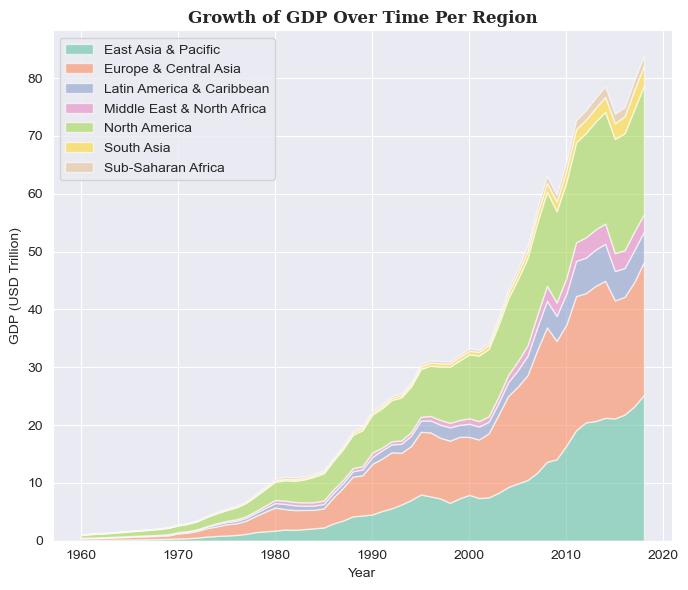

In [577]:
fig, ax = plt.subplots(figsize = (7,6))

sns.set_style("darkgrid")

region_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"]

ax.stackplot(
    gdp_pivot.index,
    *gdp_pivot.T.values/1_000_000_000_000,
    alpha = 0.6,
    colors = region_colors
)

ax.legend(gdp_pivot.columns)
ax.set_title("Growth of GDP Over Time Per Region", fontweight = "bold", fontfamily = "serif")
ax.set_xlabel("Year")
ax.set_ylabel("GDP (USD Trillion)")

ax.set_ylim(bottom = 0)

plt.tight_layout()
sns.despine();

In [ ]:
#Create stacked area chart showing growth of population over time, with each stack representing a geographic region

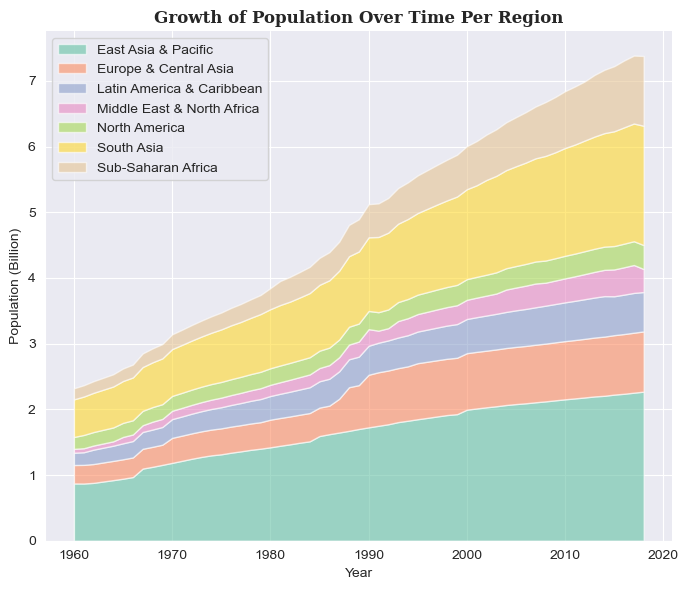

In [576]:
fig, ax = plt.subplots(figsize = (7,6))

sns.set_style("darkgrid")

region_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"]

ax.stackplot(
    pop_pivot.index,
    *pop_pivot.T.values/1000,
    alpha = 0.6,
    colors = region_colors
)

ax.legend(pop_pivot.columns)
ax.set_title("Growth of Population Over Time Per Region", fontweight = "bold", fontfamily = "serif")
ax.set_xlabel("Year")
ax.set_ylabel("Population (Billion)")

ax.set_ylim(bottom = 0)

plt.tight_layout()
sns.despine();

In [ ]:
#Create a bubble chart with life expectancy for each country in the x-axis, 
#GDP per capita in the y-axis (log scale), and population as the bubble size. 
#Color the bubbles by region using the same colors for each as in the previous charts.

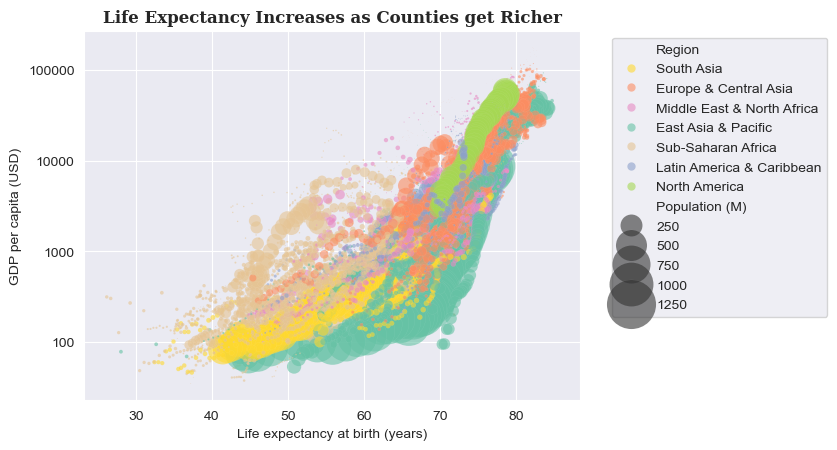

In [583]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()

region_colors = [
    "#66c2a5", "#fc8d62", "#8da0cb",
    "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"
]

sns.scatterplot(
    data = world_bank,
    x = "Life expectancy at birth (years)",
    y = "GDP per capita (USD)",
    hue = "Region",
    size = "Population (M)",
    sizes = (min(world_bank["Population (M)"]),max(world_bank["Population (M)"])),
    alpha = 0.6,
    palette = dict(zip(gdp_pivot.columns, region_colors))
).set(yscale = "log")

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

plt.title("Life Expectancy Increases as Counties get Richer", fontweight = "bold", fontfamily = "serif")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

In [ ]:
#Create a bar chart to show average HDI by region (make sure the region colors match).

In [372]:
merged_data = world_bank.merge(
    hdi_data,
    how = "left",
    left_on = "Country Code",
    right_on = "iso3"
)

In [373]:
merged_data.shape

(12449, 1024)

In [374]:
merged_data.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38


In [375]:
merged_data.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Electric power consumption (kWh per capita)', 'GDP (USD)',
       'GDP per capita (USD)',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1024)

In [381]:
merged_data.columns.str.startswith("hdi_")

array([False, False, False, ..., False, False, False])

In [400]:
merged_data.loc[
    :, (merged_data.columns.str.startswith("hdi_")) | (merged_data.columns.str.contains("Region")) | 
    (merged_data.columns.str.contains("Country Name"))
]

,Country Name,Region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,...,hdi_m_2012,hdi_m_2013,hdi_m_2014,hdi_m_2015,hdi_m_2016,hdi_m_2017,hdi_m_2018,hdi_m_2019,hdi_m_2020,hdi_m_2021
0,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.530178,0.538757,0.545574,0.542189,0.544159,0.540514,0.540120,0.546081,0.542964,0.535611
1,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.530178,0.538757,0.545574,0.542189,0.544159,0.540514,0.540120,0.546081,0.542964,0.535611
2,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.530178,0.538757,0.545574,0.542189,0.544159,0.540514,0.540120,0.546081,0.542964,0.535611
3,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.530178,0.538757,0.545574,0.542189,0.544159,0.540514,0.540120,0.546081,0.542964,0.535611
4,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.530178,0.538757,0.545574,0.542189,0.544159,0.540514,0.540120,0.546081,0.542964,0.535611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.571984,0.583565,0.593626,0.599580,0.603501,0.607765,0.615945,0.614091,0.611493,0.604054
12445,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.571984,0.583565,0.593626,0.599580,0.603501,0.607765,0.615945,0.614091,0.611493,0.604054
12446,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.571984,0.583565,0.593626,0.599580,0.603501,0.607765,0.615945,0.614091,0.611493,0.604054
12447,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.571984,0.583565,0.593626,0.599580,0.603501,0.607765,0.615945,0.614091,0.611493,0.604054


In [404]:
merged_data.loc[
    :, (merged_data.columns.str.startswith("hdi_")) | (merged_data.columns.str.contains("Region")) | 
    (merged_data.columns.str.contains("Country Name"))
].iloc[:, 0:35]

,Country Name,Region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
2,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
3,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
4,Afghanistan,South Asia,180.0,0.273,0.279,0.287,0.297,0.292,0.310,0.319,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12445,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12446,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12447,Zimbabwe,Sub-Saharan Africa,146.0,0.509,0.512,0.498,0.491,0.486,0.477,0.476,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593


In [405]:
merged_data.loc[
    :, (merged_data.columns.str.startswith("hdi_")) | (merged_data.columns.str.contains("Region")) | 
    (merged_data.columns.str.contains("Country Name"))
].iloc[:, 0:35].drop("hdi_rank_2021", axis = 1)

,Country Name,Region,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
2,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
3,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
4,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12444,Zimbabwe,Sub-Saharan Africa,0.509,0.512,0.498,0.491,0.486,0.477,0.476,0.472,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12445,Zimbabwe,Sub-Saharan Africa,0.509,0.512,0.498,0.491,0.486,0.477,0.476,0.472,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12446,Zimbabwe,Sub-Saharan Africa,0.509,0.512,0.498,0.491,0.486,0.477,0.476,0.472,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593
12447,Zimbabwe,Sub-Saharan Africa,0.509,0.512,0.498,0.491,0.486,0.477,0.476,0.472,...,0.557,0.567,0.576,0.582,0.588,0.594,0.602,0.601,0.600,0.593


In [428]:
merged_data.loc[
    :, (merged_data.columns.str.startswith("hdi_")) | (merged_data.columns.str.contains("Region")) | 
    (merged_data.columns.str.contains("Country Name"))
].iloc[:, 0:35].drop("hdi_rank_2021", axis = 1).drop_duplicates(keep = "first")

,Country Name,Region,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
59,Albania,Europe & Central Asia,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
118,Algeria,Middle East & North Africa,0.591,0.594,0.599,0.601,0.602,0.606,0.617,0.624,...,0.729,0.731,0.735,0.740,0.743,0.744,0.745,0.748,0.736,0.745
177,American Samoa,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,Andorra,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,Virgin Islands (U.S.),Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12213,West Bank and Gaza,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.701,0.703,0.698,0.710,0.715,0.719,0.723,0.727,0.716,0.715
12272,"Yemen, Rep.",Middle East & North Africa,0.383,0.386,0.391,0.397,0.399,0.409,0.419,0.427,...,0.512,0.513,0.505,0.477,0.467,0.459,0.459,0.461,0.460,0.455
12331,Zambia,Sub-Saharan Africa,0.412,0.408,0.408,0.414,0.411,0.413,0.414,0.413,...,0.548,0.554,0.557,0.562,0.564,0.568,0.572,0.575,0.570,0.565


In [429]:
merged_selected_columns = (
    
    merged_data.loc[
    :, (merged_data.columns.str.startswith("hdi_")) | (merged_data.columns.str.contains("Region")) | 
    (merged_data.columns.str.contains("Country Name"))
].iloc[:, 0:35].drop("hdi_rank_2021", axis = 1).drop_duplicates(keep = "first")
    
)

In [430]:
merged_selected_columns.shape

(211, 34)

In [431]:
merged_selected_columns.head()

,Country Name,Region,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
59,Albania,Europe & Central Asia,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
118,Algeria,Middle East & North Africa,0.591,0.594,0.599,0.601,0.602,0.606,0.617,0.624,...,0.729,0.731,0.735,0.740,0.743,0.744,0.745,0.748,0.736,0.745
177,American Samoa,East Asia & Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,Andorra,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858


In [432]:
merged_selected_columns.loc[merged_selected_columns["hdi_1990"].notna()].shape

(140, 34)

In [433]:
merged_selected_columns.loc[merged_selected_columns["hdi_1990"].notna()].head()

,Country Name,Region,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,Afghanistan,South Asia,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
59,Albania,Europe & Central Asia,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
118,Algeria,Middle East & North Africa,0.591,0.594,0.599,0.601,0.602,0.606,0.617,0.624,...,0.729,0.731,0.735,0.740,0.743,0.744,0.745,0.748,0.736,0.745
413,Argentina,Latin America & Caribbean,0.723,0.730,0.735,0.739,0.744,0.745,0.751,0.756,...,0.843,0.845,0.846,0.848,0.847,0.851,0.850,0.852,0.840,0.842
472,Armenia,Europe & Central Asia,0.656,0.649,0.618,0.616,0.620,0.627,0.632,0.641,...,0.755,0.760,0.764,0.766,0.765,0.768,0.771,0.778,0.757,0.759


In [435]:
melted_df = pd.melt(
    merged_selected_columns,
    id_vars = ["Country Name", "Region"],
    value_vars = merged_selected_columns.iloc[:,2:].columns,
    var_name = "Year",
    value_name = "HDI Score"
)

In [436]:
melted_df

,Country Name,Region,Year,HDI Score
0,Afghanistan,South Asia,hdi_1990,0.273
1,Albania,Europe & Central Asia,hdi_1990,0.647
2,Algeria,Middle East & North Africa,hdi_1990,0.591
3,American Samoa,East Asia & Pacific,hdi_1990,NaN
4,Andorra,Europe & Central Asia,hdi_1990,NaN
...,...,...,...,...
6747,Virgin Islands (U.S.),Latin America & Caribbean,hdi_2021,NaN
6748,West Bank and Gaza,Middle East & North Africa,hdi_2021,0.715
6749,"Yemen, Rep.",Middle East & North Africa,hdi_2021,0.455
6750,Zambia,Sub-Saharan Africa,hdi_2021,0.565


In [438]:
region_avg_hdi_score = melted_df.groupby("Region").agg({"HDI Score": "mean"})

In [439]:
region_avg_hdi_score

,HDI Score
Region,
East Asia & Pacific,0.695941
Europe & Central Asia,0.806643
Latin America & Caribbean,0.698407
Middle East & North Africa,0.702018
North America,0.901875
South Asia,0.549355
Sub-Saharan Africa,0.481550


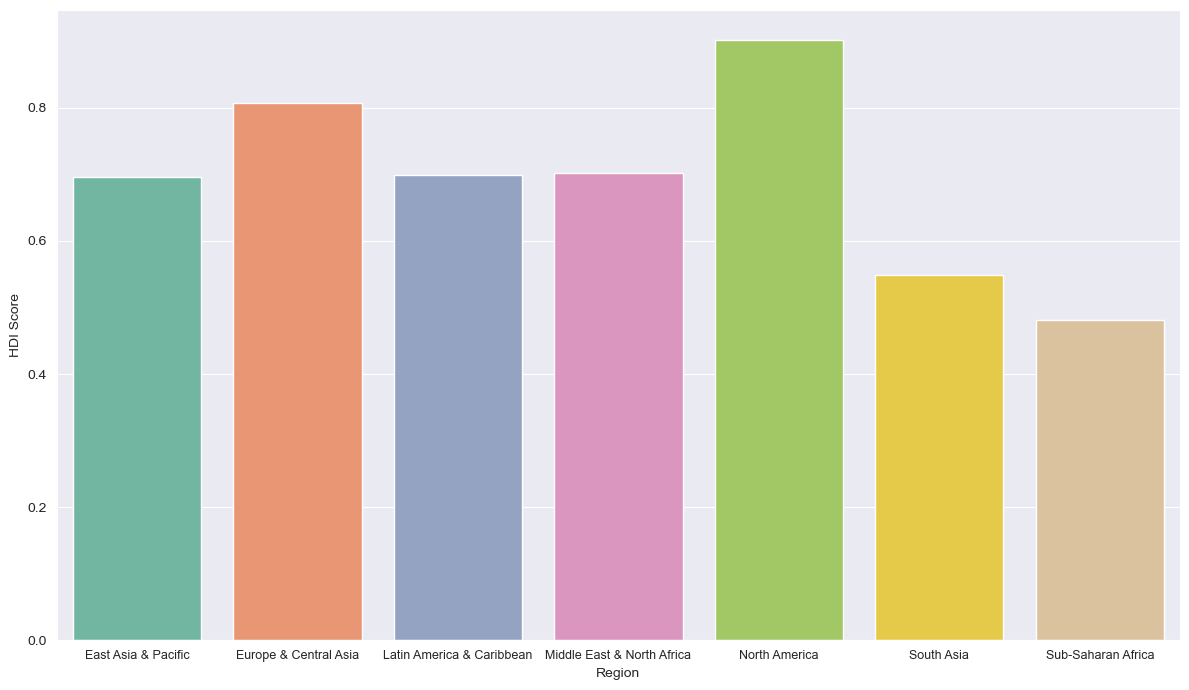

In [578]:
fig, ax = plt.subplots(figsize = (12,7))

sns.barplot(
    data = region_avg_hdi_score,
    x = region_avg_hdi_score.index,
    y = "HDI Score",
    hue = region_avg_hdi_score.index,
    palette = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"]
)

#plt.xticks(rotation=15, ha='right')

plt.xticks(fontsize = 9)
plt.tight_layout();

In [ ]:
#Create a scatterplot with power consumption in the x-axis and GDP per capita in the y-axis
#then use HDI as a color scale for the dots (make sure to remove outliers like Iceland).

In [527]:
world_bank_copy = world_bank

In [528]:
world_bank_copy["hdi_year_column"] = "hdi_" + world_bank_copy["Year"].astype("str")

In [529]:
world_bank_copy.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_year_column
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416,hdi_2018
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472,hdi_2017
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058,hdi_2016
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604,hdi_2015
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856,hdi_2014


In [530]:
hdi_df_filtered_columns = (
    hdi_data
    .loc[:, hdi_data.columns.str.startswith("hdi_") | hdi_data.columns.str.startswith("iso3")]
    .drop("hdi_rank_2021", axis = 1)
)

In [531]:
hdi_df_filtered_columns = hdi_df_filtered_columns.iloc[:,0:33]

In [532]:
hdi_df_filtered_columns.head()

,iso3,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019,hdi_2020,hdi_2021
0,AFG,0.273,0.279,0.287,0.297,0.292,0.310,0.319,0.323,0.324,...,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
2,ALB,0.647,0.629,0.614,0.617,0.624,0.634,0.645,0.642,0.657,...,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
3,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
4,ARE,0.728,0.739,0.742,0.748,0.755,0.762,0.767,0.773,0.779,...,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912,0.911


In [539]:
hdi_melted_df = pd.melt(
    hdi_df_filtered_columns,
    id_vars = "iso3",
    value_vars = hdi_df_filtered_columns.columns,
    var_name = "hdi_year",
    value_name = "HDI Score"
)

In [540]:
hdi_melted_df

,iso3,hdi_year,HDI Score
0,AFG,hdi_1990,0.273
1,AGO,hdi_1990,NaN
2,ALB,hdi_1990,0.647
3,AND,hdi_1990,NaN
4,ARE,hdi_1990,0.728
...,...,...,...
6587,ZZG.ECA,hdi_2021,0.796
6588,ZZH.LAC,hdi_2021,0.754
6589,ZZI.SA,hdi_2021,0.632
6590,ZZJ.SSA,hdi_2021,0.547


In [548]:
another_merged_df = world_bank_copy.merge(
    hdi_melted_df,
    how = "inner",
    left_on = ["Country Code", "hdi_year_column"],
    right_on = ["iso3", "hdi_year"]
)

In [559]:
another_merged_df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_year_column,iso3,hdi_year,HDI Score
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416,hdi_2018,AFG,hdi_2018,0.483
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472,hdi_2017,AFG,hdi_2017,0.482
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058,hdi_2016,AFG,hdi_2016,0.481
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604,hdi_2015,AFG,hdi_2015,0.478
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856,hdi_2014,AFG,hdi_2014,0.479


In [557]:
df_without_outliers = another_merged_df.loc[another_merged_df["Country Name"] != "Iceland"]

In [560]:
df_without_outliers.shape

(5539, 20)

In [561]:
df_without_outliers.head()

,Country Name,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_year_column,iso3,hdi_year,HDI Score
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416,hdi_2018,AFG,hdi_2018,0.483
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472,hdi_2017,AFG,hdi_2017,0.482
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058,hdi_2016,AFG,hdi_2016,0.481
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604,hdi_2015,AFG,hdi_2015,0.478
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856,hdi_2014,AFG,hdi_2014,0.479


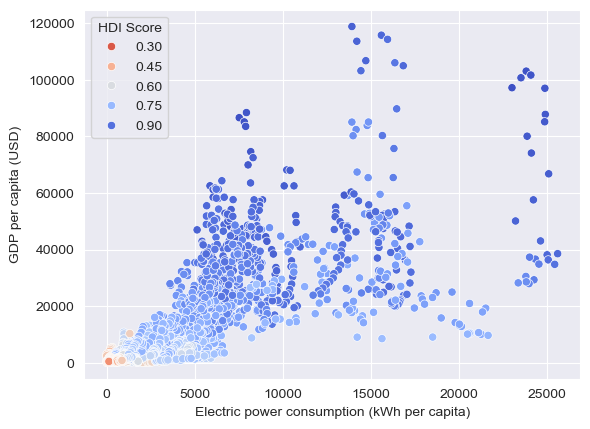

In [579]:
sns.scatterplot(
    data = df_without_outliers,
    x = "Electric power consumption (kWh per capita)",
    y = "GDP per capita (USD)",
    hue = "HDI Score",
    palette = "coolwarm_r"
);

In [551]:
another_merged_df.loc[another_merged_df["Year"] == 2014].loc[:, ["GDP per capita (USD)", "HDI Score"]]

,GDP per capita (USD),HDI Score
4,613.856,0.479
33,4578.670,0.792
62,5493.060,0.735
91,42300.300,0.871
120,5408.410,0.563
...,...,...
5427,2030.260,0.680
5456,3046.820,0.698
5485,1674.000,0.505
5514,1763.060,0.557


In [553]:
another_merged_df.loc[another_merged_df["Year"] == 2014].loc[:, ["GDP per capita (USD)", "HDI Score"]].corr()

,GDP per capita (USD),HDI Score
GDP per capita (USD),1.000000,0.649306
HDI Score,0.649306,1.000000


In [613]:
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

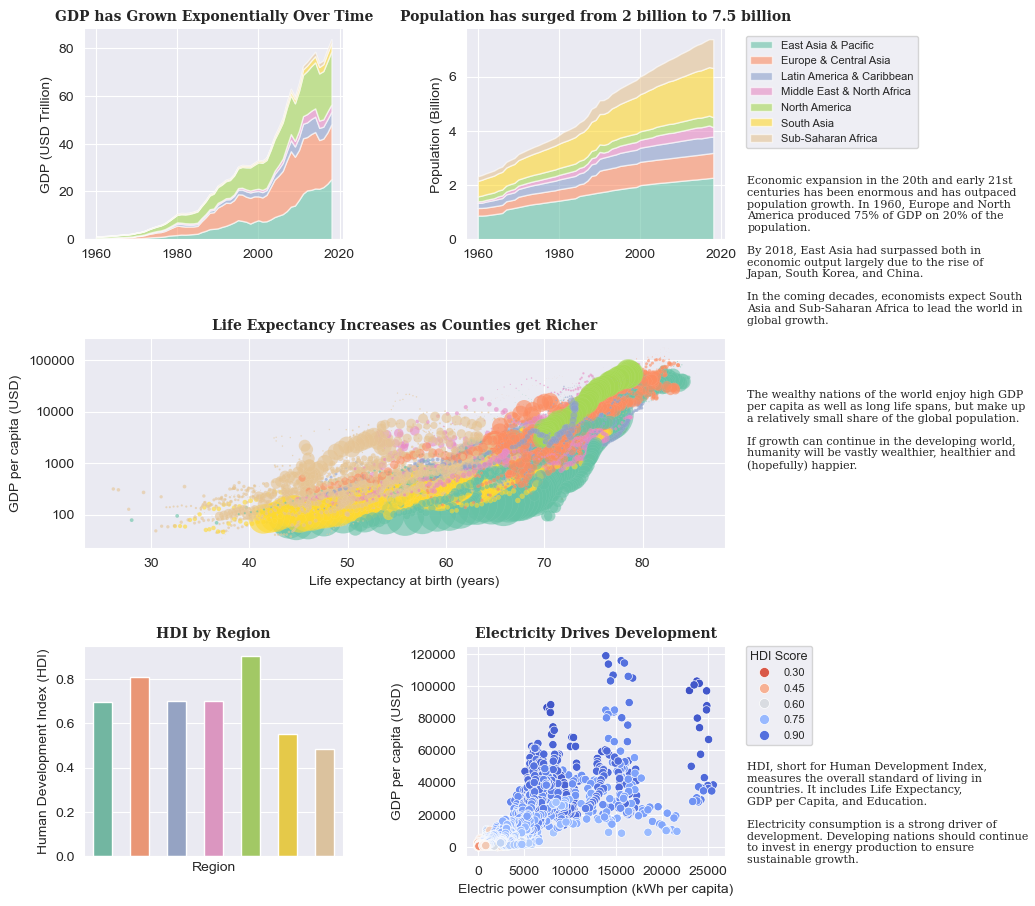

In [743]:
fig = plt.figure(figsize = (10,10))
gs = gridspec.GridSpec(ncols = 10, nrows = 16)

sns.set_style("darkgrid")
region_colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", "#e5c494"]


#Stacked Area Chart showing Growth of GDP over Time
ax1 = fig.add_subplot(gs[0:4, 0:3])

ax1.stackplot(
    gdp_pivot.index,
    *gdp_pivot.T.values/1_000_000_000_000,
    alpha = 0.6,
    colors = region_colors,
    labels = ["", ""]
)

ax1.set_title("GDP has Grown Exponentially Over Time", fontweight = "bold", fontfamily = "serif", fontsize = 10)
ax1.set_ylabel("GDP (USD Trillion)")

ax1.set_ylim(bottom = 0)

plt.tight_layout()
sns.despine();


#Stacked Area Chart showing Sum of Population over Time
ax2 = fig.add_subplot(gs[0:4, 4:7])

ax2.stackplot(
    pop_pivot.index,
    *pop_pivot.T.values/1000,
    alpha = 0.6,
    colors = region_colors,
    labels = pop_pivot.columns
)

ax2.legend(
    loc="center left",
    bbox_to_anchor=(1.08, 0.7),
    frameon=True,
    borderaxespad=0,
    fontsize=8
)

ax2.set_title("Population has surged from 2 billion to 7.5 billion", fontweight = "bold", fontfamily = "serif", fontsize = 10)
ax2.set_ylabel("Population (Billion)")

ax2.set_ylim(bottom = 0)

sns.despine();


#Bubble Chart Showing Life Expectancy of Countries Over time
ax3 = fig.add_subplot(gs[5:9, 0:7])

sns.scatterplot(
    data = world_bank,
    x = "Life expectancy at birth (years)",
    y = "GDP per capita (USD)",
    hue = "Region",
    size = "Population (M)",
    sizes = (min(world_bank["Population (M)"]),max(world_bank["Population (M)"])),
    alpha = 0.6,
    legend = False,
    palette = dict(zip(gdp_pivot.columns, region_colors))
).set(yscale = "log")

ax3.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax3.set_title("Life Expectancy Increases as Counties get Richer", fontweight = "bold", fontfamily = "serif", fontsize = 10)


#Bar Chart Showing Average HDI Score by Region
ax4 = fig.add_subplot(gs[10:14, 0:3])

sns.barplot(
    data = region_avg_hdi_score,
    x = region_avg_hdi_score.index,
    y = "HDI Score",
    hue = region_avg_hdi_score.index,
    palette = region_colors,
    width = 0.5
)
ax4.set_xticks([]) 
ax4.set_title("HDI by Region", fontweight = "bold", fontfamily = "serif", fontsize = 10)
ax4.set_ylabel("Human Development Index (HDI)")


#Scatterplot showing Electric Power Consumption and GDP per Capita 
ax5 = fig.add_subplot(gs[10:14, 4:7])

sns.scatterplot(
    data = df_without_outliers,
    x = "Electric power consumption (kWh per capita)",
    y = "GDP per capita (USD)",
    hue = "HDI Score",
    palette = "coolwarm_r"
)

ax5.set_title("Electricity Drives Development", fontweight = "bold", fontfamily = "serif", fontsize = 10)

ax5.legend(
    title="HDI Score",
    bbox_to_anchor=(1.08, 1),      
    loc='upper left',
    borderaxespad=0,
    fontsize=8,                     
    title_fontsize=9,                
    markerscale=1.2           
)

#Write Text on right of ax2 (Stacked Area Chart) below Region legend explaining the data

ax6 = fig.add_subplot(gs[0:4, 7:10])
ax6.axis('off')

ax6.text(
    -0.02, 0.3,  # (x, y) coordinates in axis fraction space
    "Economic expansion in the 20th and early 21st centuries has been enormous and has outpaced\n"
    "population growth. In 1960, Europe and North America produced 75% of GDP on 20% of the\n"
    "population.\n\n"
    "By 2018, East Asia had surpassed both in economic output largely due to the rise of\n"
    "Japan, South Korea, and China.\n\n"
    "In the coming decades, economists expect South Asia and Sub-Saharan Africa to lead the world in\n"
    "global growth.",
    fontsize=8,
    va='top',
    ha='left',
    wrap=True,
    fontfamily='serif'
)

#Write Text on right of ax3 (Bubble Chart) explaining the data

ax7 = fig.add_subplot(gs[5:9, 7:10])
ax7.axis('off')

ax7.text(
    -0.02, 0.75, 
    "The wealthy nations of the world enjoy high GDP per capita as well as long life spans, but make up\n"
    "a relatively small share of the global population.\n\n"
    "If growth can continue in the developing world, humanity will be vastly wealthier, healthier and\n"
    "(hopefully) happier.",
    fontsize=8,
    va='top',
    ha='left',
    wrap=True,
    fontfamily='serif'
)

#Write Text on right of ax5 (Scatter Plot) explaining the data;

ax8 = fig.add_subplot(gs[10:14, 7:10])
ax8.axis('off')

ax8.text(
    -0.02, 0.45,
    "HDI, short for Human Development Index, measures the overall standard of living in\n"
    "countries. It includes Life Expectancy,\n"
    "GDP per Capita, and Education.\n\n"
    "Electricity consumption is a strong driver of development. Developing nations should continue\n"
    "to invest in energy production to ensure\n"
    "sustainable growth.",
    fontsize=8,
    va='top',
    ha='left',
    wrap=True,
    fontfamily='serif'
);
